<a href="https://colab.research.google.com/github/stealthOG/Skill_Lab/blob/main/85_Import_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## '85 Import Cars EDA

#### Ekwe Collins Odinaka
##### 26th October 2022


This is an exploratory data analysis on the 1985 import cars to see the factors that play a role in determining the car price and how to predict the car price

### Importing Necessary Libraries and Dataset

The first thing to be done is to import the various libraries or modules needed for the exploratory analysis and data visualization

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

After importing the necessary dependencies, the next step is to download the data using the `read_csv()` pandas method.

In [ ]:
file_path = 'C:\\Users\\COLLINS\\Downloads\\imports-85.data'

In [ ]:
import_data = pd.read_csv(file_path, header=None)
import_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


The dataset has no header, but the headers has been defined in a list with variable name 'headers'. We save the list, the input the elements of the list as column headers.

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
import_data.columns=headers
import_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The headers element has been added to the dataset as column heads. Next is to run a statistical summary on the data usng the `.describe()` method

In [ ]:
import_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
import_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Data Cleaning

Data Cleaning or pre-processing is a vital aspect of data analysis. Here missing values are checked for are replaced or dropped. The various datatypes are also confirmed to see that they suit the column purpose. Data wrangling is performed if the initial data format is not suited for the proposed analysis.

Missing values denoted with the question sign `?` will be replaced with `Nan` meaning not a number using the `.replace()` method

In [ ]:
import_data.replace('?', np.nan, inplace=True)
import_data.replace('inf', np.nan, inplace=True)
import_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


Next we check for all missing data present in each column in the dataset and count them to know how significant they are to the dataset. To check for the missing values, the `isnull()` method is used and to count the missing values, the `.value_counts()` method is used.

In [ ]:
missing_values = import_data.isnull()

for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

7 columns in total have missing values. The column with the most missing values is the normalized loss column with `41` missing values. the remaining 6 columns that includes bore, horsepower, stroke, num_of_doors, price, and peak-rpm have missing values that ranges between 1 and 4

##### Dealing with missing values

There are few approaches to follow when ecoutered with missing values. The first option is always to find the missig values but in cases when that is impossible the option left is either to replace the values with assumed values (e.g mean or the most frequent occuring value) or drop the row or column.

For this dataset, the normalized_loss, bore, horesepower, stroke, and peak-rpm columns missig values will be replaced with the mean. The num_of_doors column will be replaced by frequency as four occured 114 times out of 203 present values. The missing price values will be dropped as it is the target variable.


#### Replace Missing Values with Mean and Freq 

1. Calculate the mean for the normalized loss column, then replace the missing values in the normalized column with the calculated mean.

In [ ]:
norm_loss_mean = import_data["normalized-losses"].astype("float").mean(axis=0)

import_data["normalized-losses"].replace(np.nan, norm_loss_mean, inplace=True)

2. Calculate the mean for the bore column, then replace the missing values in the bore with the calculated mean.

In [ ]:
bore_mean = import_data["bore"].astype("float").mean(axis=0)

import_data["bore"].replace(np.nan, bore_mean, inplace=True)

3. Calculate the mean for the stroke column, then replace the missing values in the stroke with the calculated mean.

In [ ]:
stroke_mean = import_data["stroke"].astype("float").mean(axis=0)

import_data["stroke"].replace(np.nan, stroke_mean, inplace=True)

4.  Calculate the mean for the peak-rpm column, then replace the missing values in the peak-rpm with the calculated mean.

In [ ]:
rpm_mean = import_data["peak-rpm"].astype("float").mean(axis=0)

import_data["peak-rpm"].replace(np.nan, rpm_mean, inplace=True)

5. Calculate the freq for the number of doors column, then replace the missing values in the num_of_doors column with the most freq value.

In [ ]:
import_data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Using `.value_counts()` method, the four door appeared 114 times while two doors appeared 89 times. Another method to use is the `.idxmax()` method that returns the value with the most occurrence.

In [ ]:
import_data['num-of-doors'].value_counts().idxmax()

'four'

Replace the missing values with four

In [ ]:
import_data["num-of-doors"].replace(np.nan, "four", inplace=True)

#### Drop the Missing Values in the Price Column

The essence of this analysis is to predict the price of cars using other variables making the price column the target variable. The missing price values are dropped using the `.dropna()` method

In [ ]:
import_data.dropna(subset=["price"], axis=0, inplace=True)

Check for Numpy infinite values and drop them

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

In [ ]:
import_data.dropna(inplace=True)
import_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Check for Datatypes

Datatypes are format in which the data is beig stored in a given data structure. Each colum has a datatype that all data in the column must follow and also that it suits the colum purpose. For example an age column should not have `float` as it datatype but `int`. Use the `.dtypes` method to check the various data types present

In [ ]:
import_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

From the data types above, it is clear some columns have the wrong data format and need to be formatted to the correct data format. 

#### Convert to the correct format

In [ ]:
import_data[["bore", "stroke"]] = import_data[["bore", "stroke"]].astype("float")
import_data[["normalized-losses"]] = import_data[["normalized-losses"]].astype("int")
import_data[["price"]] = import_data[["price"]].astype("float")
import_data[["peak-rpm"]] = import_data[["peak-rpm"]].astype("float")
import_data[["horsepower"]] = import_data[["horsepower"]].astype("float")

#### Using Standardized Units

The dataset uses mpg(miles per gallon) for fuel consumption on the city and highway column. The standard unit for fuel consumption in Nigeria is Litres per 100 kilometres (L/100km). To convert from mpg t L/100km we divide the city and highway columns by `235`

In [ ]:
import_data["city-L/100km"] = 235/import_data["city-mpg"]

import_data["highway-L/100km"] = 235/import_data["highway-mpg"]

After converting the city and highway units from mpg to L/100km, the next step is to chage the names of the columns to city-L/100km and highway-L/100km respectively using the `.rename()` method

In [ ]:
import_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


#### Convert the Horsepower into bins of Categorize values

The horsepower column can be categorize into high, medium and low groups using the `bins` method

In [ ]:
bins = np.linspace(min(import_data["horsepower"]), max(import_data["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
import_data['horsepower-binned'] = pd.cut(import_data['horsepower'], bins, labels=group_names, include_lowest=True )
import_data[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
10,101.0,Low


We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.

In [ ]:
import_data["horsepower-binned"].value_counts()

Low       151
Medium     43
High        5
Name: horsepower-binned, dtype: int64

#### Plot the Bins Visualization

Text(0.5, 1.0, 'horsepower bins')

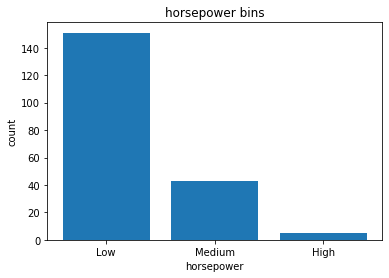

In [ ]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, import_data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#### Create a indicator Variable

An idicator variable will be created for the `fuel-type and aspiration` column as it has 2 variables gas or diesel. The indicator variable was created to allow for regression analysis. Regression only understand umbers not words.

In [ ]:
indicator_variable = pd.get_dummies(import_data["fuel-type"])
indicator_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Rename the columns for clarity

In [ ]:
indicator_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
indicator_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:

df = pd.concat([import_data, indicator_variable], axis=1)


df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,177.3,...,110.0,5500.0,19,25,15250.0,12.368421,9.400000,Low,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,192.7,...,110.0,5500.0,19,25,17710.0,12.368421,9.400000,Low,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,192.7,...,110.0,5500.0,19,25,18920.0,12.368421,9.400000,Low,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,192.7,...,140.0,5500.0,17,20,23875.0,13.823529,11.750000,Medium,0,1
10,2,192,bmw,std,two,sedan,rwd,front,101.2,176.8,...,101.0,5800.0,23,29,16430.0,10.217391,8.103448,Low,0,1


In [ ]:
indicator_variable_1 = pd.get_dummies(df["aspiration"])
indicator_variable_1.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
indicator_variable_1.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
indicator_variable_1.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:

df = pd.concat([df, indicator_variable_1], axis=1)


df.drop("aspiration", axis = 1, inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


### Data Visualization and Correlation

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

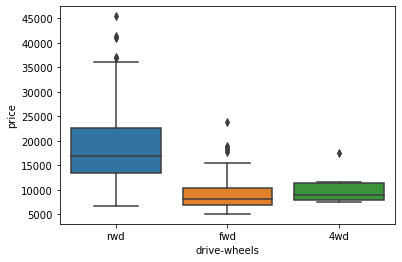

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

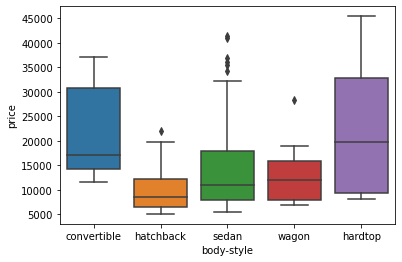

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

Text(0, 0.5, 'Price')

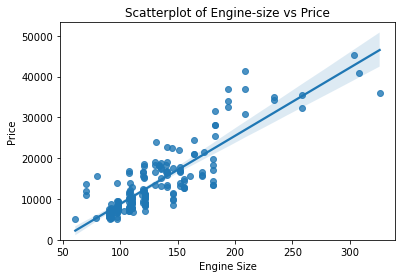

In [ ]:
from matplotlib import pyplot as plt

x = df["engine-size"]
y = df["price"]
sns.regplot(x = "engine-size",y = "price", data = df)
plt.ylim(0,)

plt.title("Scatterplot of Engine-size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.873887
price,0.873887,1.000000


The viz shows a positive correlation between engine size and price. As the price goes up so does the engine size.

Text(0, 0.5, 'Price')

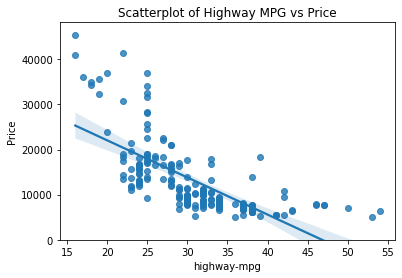

In [ ]:
sns.regplot(x = "highway-mpg",y = "price", data = df)
plt.ylim(0,)

plt.title("Scatterplot of Highway MPG vs Price")
plt.xlabel("highway-mpg")
plt.ylabel("Price")

Unlike the positive correlatio shared between engine size and price, the highway mpg has a negative correlation with price. This makes sense as an increase in fuel consumption shows a decrease in price.

The correlation between price vs engine size and price vs highway-mpg shows though opposite i nature shows a steep correlation making a good indicator or variable to predict price.

Text(0, 0.5, 'Price')

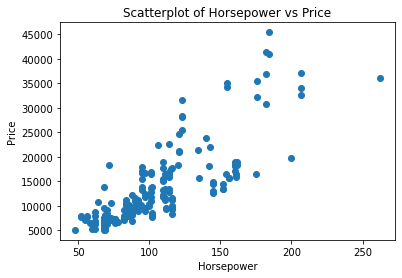

In [ ]:
from matplotlib import pyplot as plt

x = df["horsepower"]
y = df["price"]
plt.scatter(x,y)

plt.title("Scatterplot of Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")

The next step is to check for the average `price` of vehicles and observe how they differ betwee different types of `body styles` and `drive wheels` variables

First step is to use the `groupby()` method

In [ ]:
df1 = df[["body-style", "drive-wheels", "price"]]

df1_group = df1.groupby(["drive-wheels", "body-style"], as_index = False).mean()

df1_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8365.166667
6,fwd,sedan,9811.800000
7,fwd,wagon,10061.181818
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


To make this table easy to read, transform the table to a pivot table using the `pivot()` method

In [ ]:
df_pivot = df1_group.pivot(index = "drive-wheels", columns = "body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

Due to the missing values on the pivot table, a `.fillna()` method is called to fill the missing values with zero

In [ ]:
df_pivot = df_pivot.fillna(0) #fill missing values with 0
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

<function matplotlib.pyplot.show(close=None, block=None)>

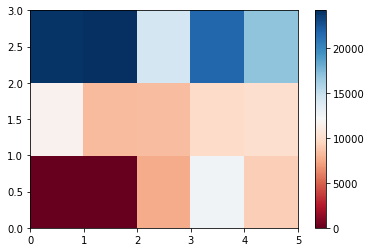

In [ ]:
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show

### Correlation Statistical Method

In [ ]:
df_corr = df.corr()
df_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.467790,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.141264,-0.011029,...,0.280635,-0.035228,0.036293,-0.082465,0.066253,-0.029590,-0.197062,0.197062,0.054255,-0.054255
normalized-losses,0.467790,1.000000,-0.056718,0.019443,0.086846,-0.375740,0.099413,0.112369,-0.029898,0.056234,...,0.239544,-0.225147,-0.181879,0.134140,0.238581,0.181247,-0.101603,0.101603,0.006919,-0.006919
wheel-base,-0.537706,-0.056718,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.496489,0.170935,...,-0.360593,-0.472877,-0.543647,0.583797,0.477141,0.577205,0.306224,-0.306224,-0.255331,0.255331
length,-0.365957,0.019443,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.608335,0.118313,...,-0.286321,-0.664865,-0.699033,0.693965,0.657629,0.709066,0.212862,-0.212862,-0.232461,0.232461
width,-0.243933,0.086846,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.544266,0.186389,...,-0.245975,-0.633139,-0.681131,0.753871,0.673398,0.738137,0.245669,-0.245669,-0.307704,0.307704
height,-0.546717,-0.375740,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.183466,-0.054399,...,-0.311574,-0.051387,-0.105200,0.134990,0.004241,0.083821,0.281983,-0.281983,-0.089146,0.089146
curb-weight,-0.232893,0.099413,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.645218,0.172537,...,-0.279375,-0.750287,-0.794937,0.835090,0.785547,0.837088,0.220954,-0.220954,-0.322009,0.322009
engine-size,-0.111110,0.112369,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.572726,0.207801,...,-0.256773,-0.650552,-0.679688,0.873887,0.745026,0.784091,0.071237,-0.071237,-0.110750,0.110750
bore,-0.141264,-0.029898,0.496489,0.608335,0.544266,0.183466,0.645218,0.572726,1.000000,-0.066793,...,-0.267785,-0.581395,-0.592236,0.546586,0.554770,0.561181,0.056171,-0.056171,-0.230610,0.230610
stroke,-0.011029,0.056234,0.170935,0.118313,0.186389,-0.054399,0.172537,0.207801,-0.066793,1.000000,...,-0.065272,-0.027582,-0.036350,0.093688,0.034652,0.053419,0.253372,-0.253372,-0.232984,0.232984


In [ ]:
df[["horsepower", "price"]].corr()

,horsepower,price
horsepower,1.000000,0.810533
price,0.810533,1.000000


In [ ]:
df[["width", "price"]].corr()

,width,price
width,1.000000,0.753871
price,0.753871,1.000000


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6892532361080421  with a P-value of P =  2.204870808003791e-29


#### Conclusion:

Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, although the linear relationship isn't extremely strong (-0.686).

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8738869517981516  with a P-value of P =  1.26506744790746e-63


#### Conclusion:

Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, the linear relationship is extremely strong (0.872).

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8350904472742751  with a P-value of P =  5.017116685971367e-53


#### Conclusion:

Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, the linear relationship is extremely strong (0.834).

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8105330821322063  with a P-value of P =  1.1891278276946466e-47


Conclusion:
Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, the linear relationship is extremely strong (0.811).

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.7052298604211742  with a P-value of P =  3.008766425754823e-31


#### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, as they have a negative linear relationship (-0.705).

#### Analysis Of Variance (ANOVA)

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

#### Drive-wheels

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

To see if different types of `drive-wheels` impact `price`, we group the data.

In [ ]:
df1_gp = df1[['drive-wheels', 'price']].groupby(['drive-wheels'])
df1_gp.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
140,4wd,7603.0


In [ ]:
df1

,body-style,drive-wheels,price
0,convertible,rwd,13495.0
1,convertible,rwd,16500.0
2,hatchback,rwd,16500.0
3,sedan,fwd,13950.0
4,sedan,4wd,17450.0
...,...,...,...
200,sedan,rwd,16845.0
201,sedan,rwd,19045.0
202,sedan,rwd,21485.0
203,sedan,rwd,22470.0


We ca get values of individual groups (e.g the 4wd group) with price using the `get_group()` method

In [ ]:
df1_gp.get_group('4wd')['price']

4      17450.0
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

We can use the function `f_oneway` in the module `stats` to obtain the `F-test score` and `P-value`.

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(df1_gp.get_group('fwd')['price'], df1_gp.get_group('rwd')['price'], df1_gp.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 66.92990285052078 , P = 6.995421830700255e-23


With a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance is a good result. To confirm if the individual groups have this strong results, we examine them individually

##### fwd and rwd

In [ ]:
f_val, p_val = stats.f_oneway(df1_gp.get_group('fwd')['price'], df1_gp.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 128.48137608625743 , P = 4.6725694222937356e-23


##### fwd ad 4wd

In [ ]:
f_val, p_val = stats.f_oneway(df1_gp.get_group('fwd')['price'], df1_gp.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.6621740397322757 , P = 0.41737884563910455


##### rwd and 4wd

In [ ]:
f_val, p_val = stats.f_oneway(df1_gp.get_group('rwd')['price'], df1_gp.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

##### Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

##### Categorical variables:

* Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

### Model Development


Linear Regression is the model that will be used to predict the target variable (`price`). This method help us understand the relationship between two variable:

The predictor/independent variable(s) (X)
The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable(s) as a function of the predictor (independent) variable.

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

The `engine-size` variable has a strong positive correlation with price. Let's use a simple linear regression model to see how the engine-size variable can predict the price variable

In [ ]:
X = df[['engine-size']]
Y = df['price']

Use the `.fit` method together with the linear regression model

In [ ]:
lm.fit(X, Y)

LinearRegression()

We can predict the outcome using the `.predict` method

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([13773.78492057, 13773.78492057, 17447.65261398, 10266.91121321,
       14775.74883695])

In [ ]:
lm.intercept_

-7935.433267801041

In [ ]:
lm.coef_

array([166.99398606])

What is the final estimated linear model we get?
As we saw above, we should get a final linear model with the structure:

Yhat = b<sub>o</sub> + b<sub>1</sub>X

Where:

* Yhat = Target Variable

* b<sub>o</sub> = Intercept

* b<sub>1</sub> = Slope

* X = Predictor Variable

Plugging in the actual values we get:

Yhat = -7935.43 + 166.99 x engine-size

In [ ]:
df[['engine-size', 'price']] 

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


Let's check how could of a predictor variable is engine-size in predicting price

In [ ]:
Yhat = -7935.43 + 166.99 * 130
Yhat

13773.27

The actual value of price at engine size `130` is `13495.0`. The predicted price is `13773.27`. 

#### Multiple Linear Regression

Using more variables to predict the target variable in this case price for a more accurate result, we use the multiple linear regression. Most real world cases involve the use of more tha one independent variable to predict a target variable.

For this project, 5 indepedent variables will be use as they have strong correlation relationship with price (both positive and negative). 

#### The 5 independent variables include:

* Curb-weight
* engine-size
* highway-mpg
* horsepower

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the five selected independent variables.

In [ ]:
lm.fit(Z, df['price'])

LinearRegression()

In [ ]:
lm.intercept_

-15700.573979039304

In [ ]:
lm.coef_

array([53.27878556,  4.66217408, 82.22948394, 35.5175845 ])

In [ ]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
200,114.0,2952,141,28
201,160.0,3049,141,25
202,134.0,3012,173,23
203,106.0,3217,145,27


The linear model regression model for this project to predict price is given below:

Yhat = b<sub>o</sub> + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>2</sub> + b<sub>3</sub>X<sub>3</sub> + b<sub>4</sub>X<sub>4</sub>

Price = -15700.57 + 53.28(horsepower) + 4.66(curb-weight) + 82.23(engine-size) + 35.52(highway-mpg)

#### Model Evaluation Using Visualization

Using the visualizatiion to evaluate model is one of many ways to check if the model fits the dataset. 
Regression plot, Residual plot and distribution plot are ways visualization that show if a model fit.

For this project, we will be using a distribution plot to see if the model fit.

C:\Users\COLLINS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\COLLINS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


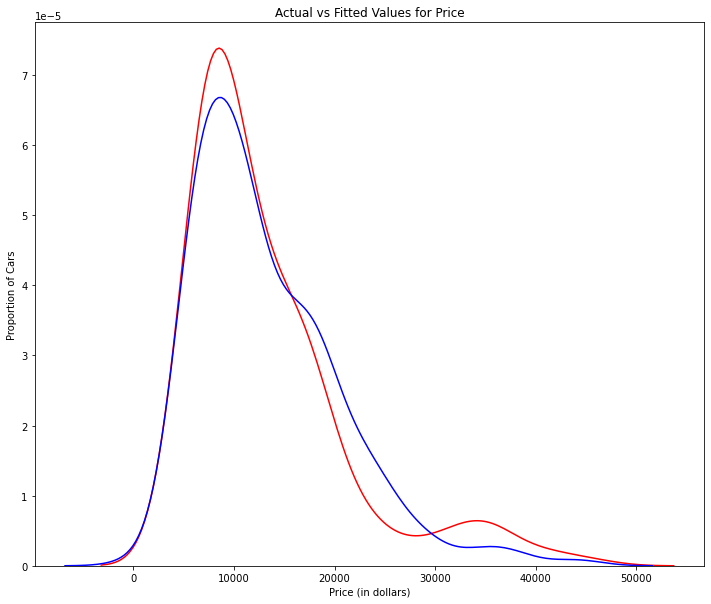

In [ ]:
Y_hat = lm.predict(Z)

width = 12
height = 10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### Model Evaluation using M.S.E and R-Squared

Let's calculate the R square for this model

In [ ]:
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.811469396425812


We can say that \~81.15 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the Mean Square Error (M.S.E)

In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11941505.191703446
